By [Yulandy Chiu](https://www.youtube.com/@YulandySpace)

Aided with Gemini/Claude/ChatGPT and modified by Yulandy Chiu

Version: 2024/07/05

Videos:
* [[10分鐘搞懂機器學習] 3.5 小批量梯度下降 深度學習的參數搜尋演算法Mini-batch gradient descent (Mini-batch GD)](https://youtu.be/vBg6huGvJTc?si=LBdgETYc4oKlOg7A)

Facebook: [Yulandy Chiu的AI資訊站](https://www.facebook.com/yulandychiu)

 This code is licensed under the Creative Commons Attribution-NonCommercial 4.0
 International License (CC BY-NC 4.0). You are free to use, modify, and share this code for non-commercial purposes, provided you give appropriate credit. For more details, see the LICENSE file or visit: https://creativecommons.org/licenses/by-nc/4.0/
 © [2024] [Yulandy Chiu](https://www.youtube.com/@YulandySpace)


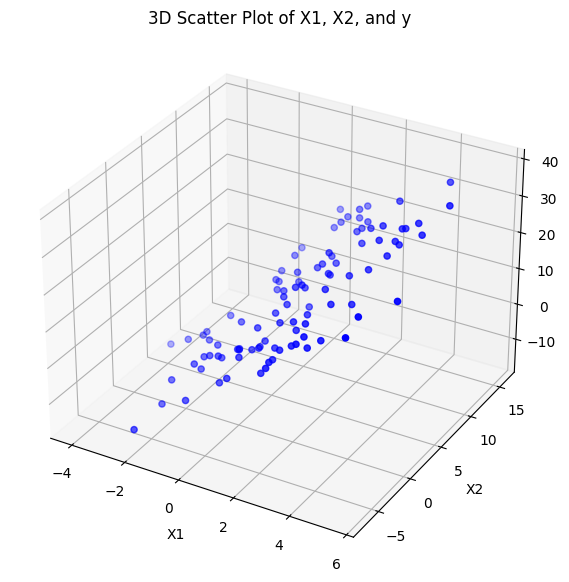

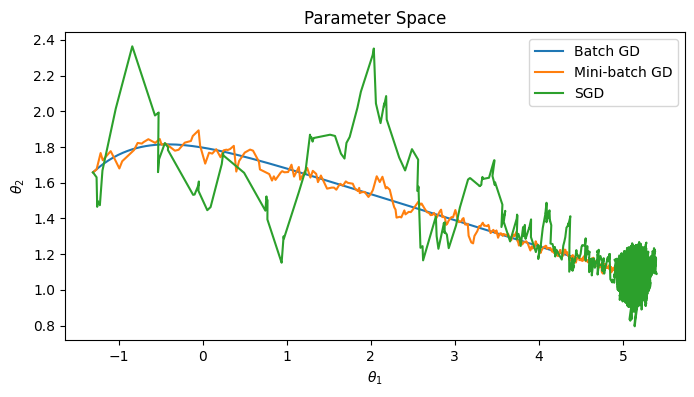

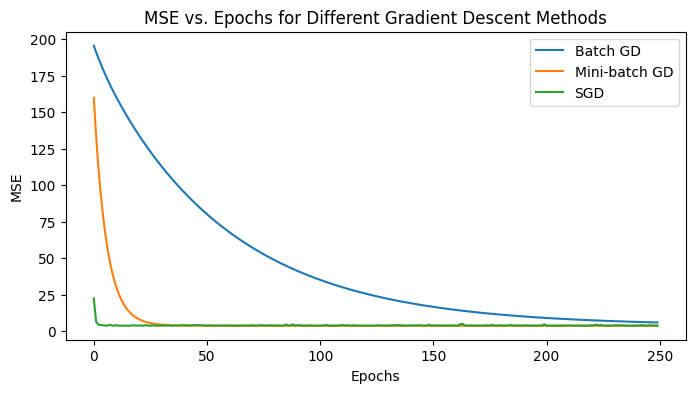

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


np.random.seed(0)
X1 = np.random.normal(1, 2, 100)
X2 = np.random.normal(4, 5, 100)
X = np.c_[X1, X2]
y = 5 * X[:, 0] + X[:, 1] + np.random.normal(1, 2, 100)


# 初始化
def initialize_params():
    return np.random.randn(2)

# 預測
def predict(X, theta):
    return np.dot(X, theta)

# 均方誤差損失函數
def compute_loss(y, y_pred):
    return np.mean((y - y_pred) ** 2)

# 計算梯度
def compute_gradients(X, y, y_pred):
    m = len(y)
    gradients = -2/m * np.dot(X.T, (y - y_pred))
    return gradients

# 批量梯度下降
def batch_gradient_descent(X, y, theta, learning_rate, n_epochs):
    theta_path = [theta]
    mse_list = []
    for _ in range(n_epochs):
        y_pred = predict(X, theta)
        gradients = compute_gradients(X, y, y_pred)
        theta = theta - learning_rate * gradients
        theta_path.append(theta)
        mse_list.append(compute_loss(y, y_pred))
    return theta, theta_path, mse_list

# 小批量梯度下降
def mini_batch_gradient_descent(X, y, theta, learning_rate, n_epochs, batch_size):
    theta_path = [theta]
    mse_list = []
    m = len(y)
    for _ in range(n_epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            y_pred = predict(X_batch, theta)
            gradients = compute_gradients(X_batch, y_batch, y_pred)
            theta = theta - learning_rate * gradients
            theta_path.append(theta)
        mse_list.append(compute_loss(y, predict(X, theta)))
    return theta, theta_path, mse_list

# 隨機梯度下降
def stochastic_gradient_descent(X, y, theta, learning_rate, n_epochs):
    theta_path = [theta]
    mse_list = []
    m = len(y)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            X_i = X[random_index:random_index+1]
            y_i = y[random_index:random_index+1]
            y_pred = predict(X_i, theta)
            gradients = compute_gradients(X_i, y_i, y_pred)
            theta = theta - learning_rate * gradients
            theta_path.append(theta)
        mse_list.append(compute_loss(y, predict(X, theta)))
    return theta, theta_path, mse_list

# 設置參數
learning_rate = 0.001
n_epochs = 250




batch_size = 10




# 初始化theta
theta_init = initialize_params()

# 執行梯度下降
theta_batch, path_batch, mse_batch = batch_gradient_descent(X, y, theta_init, learning_rate, n_epochs)
theta_mini_batch, path_mini_batch, mse_mini_batch = mini_batch_gradient_descent(X, y, theta_init, learning_rate, n_epochs, batch_size)
theta_sgd, path_sgd, mse_sgd = stochastic_gradient_descent(X, y, theta_init, learning_rate, n_epochs)



# 創建 3D 圖
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# 繪製 3D 散點圖
ax.scatter(X1, X2, y, c='blue', marker='o')

# 設置標題和軸標籤
ax.set_title('3D Scatter Plot of X1, X2, and y')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

# 顯示圖表
plt.show()



# 繪製參數空間的疊代過程
def plot_paths(paths, title):
    plt.figure(figsize=(8, 4))
    for path, label in paths:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], label=label)
    plt.xlabel(r'$\theta_1$')
    plt.ylabel(r'$\theta_2$')
    plt.title(title)
    plt.legend()
    plt.show()

# 繪製結果
plot_paths([(path_batch, 'Batch GD'), (path_mini_batch, 'Mini-batch GD'), (path_sgd, 'SGD')], 'Parameter Space')



# 繪製MSE vs epochs
plt.figure(figsize=(8, 4))
plt.plot(mse_batch, label='Batch GD')
plt.plot(mse_mini_batch, label='Mini-batch GD')
plt.plot(mse_sgd, label='SGD')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('MSE vs. Epochs for Different Gradient Descent Methods')
plt.legend()
plt.show()
